In [1]:
# %% imports
import pandas as pd
import seaborn as sns
from IPython import display


In [2]:
# %% create DataFrame
df = pd.read_csv("../data/employee_data.csv", index_col=[0])
df

,Name,Department,Role,YearsExperience,Age,Gender,Education,PerformanceScore,Salary,ProjectsCompleted,TrainingHours,SatisfactionScore
EmployeeID,,,,,,,,,,,,
1001,John Doe,Engineering,Software Engineer,5,30,M,Bachelor's,85,75000,12,40,4.2
1002,Jane Smith,Marketing,Marketing Specialist,3,28,F,Master's,78,65000,8,30,3.9
1003,Mike Johnson,Sales,Sales Representative,7,35,M,Bachelor's,92,80000,15,25,4.5
1004,Emily Brown,HR,HR Manager,10,40,F,Master's,88,90000,6,50,4.0
1005,David Lee,Engineering,Senior Developer,8,37,M,PhD,95,100000,20,60,4.7
1006,Sarah Wilson,Finance,Financial Analyst,4,29,F,Bachelor's,82,70000,10,35,4.1
1007,Chris Taylor,Marketing,Content Creator,2,25,M,Bachelor's,75,55000,6,20,3.8
1008,Lisa Anderson,Sales,Sales Manager,12,45,F,Master's,90,110000,25,45,4.3
1009,Tom White,Engineering,QA Engineer,6,33,M,Bachelor's,80,72000,14,30,3.9


In [3]:
# %% a. calculate average salary and performance score for each department
df.groupby("Department").agg(
    Avg_Salary=("Salary", "mean"),
    Avg_PerformanceScore=("PerformanceScore", "mean")
)


,Avg_Salary,Avg_PerformanceScore
Department,,
Engineering,88000.000000,88.25
Finance,82500.000000,85.50
HR,72333.333333,82.00
Marketing,70666.666667,80.00
Sales,86000.000000,87.00


In [4]:
# %% b. Identify the top 3 employees based on a composite score (you decide how to calculate this)
# composite_score is performance_score * satisfaction_score * projects_completed * training_hours

df["CompositeScore"] = (df["PerformanceScore"] * df["ProjectsCompleted"] * df["TrainingHours"]) / 1000

df[["Name", "CompositeScore"]].nlargest(3, "CompositeScore")


,Name,CompositeScore
EmployeeID,,
1014,Sophia Lee,143.22
1005,David Lee,114.00
1008,Lisa Anderson,101.25


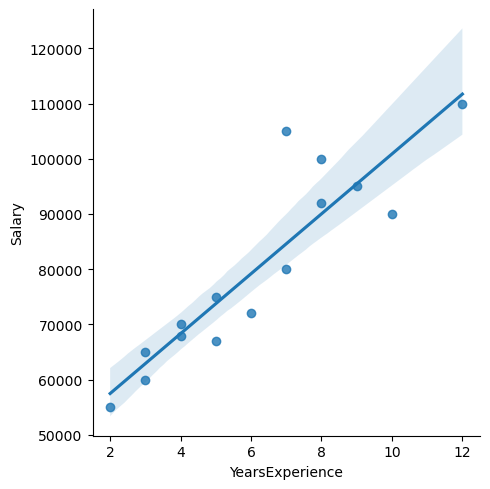

In [6]:
# %% c. Analyze the relationship between years of experience and salary.
# Create a scatter plot and calculate the correlation coefficient
correlation_coefficient = df[["YearsExperience", "Salary"]].corr().iloc[0, 1]

sns.lmplot(x="YearsExperience", y="Salary", data=df, fit_reg=True)


In [7]:
# %% d. Compare the average performance scores across different education levels
education_levels = df.groupby("Education")["PerformanceScore"].mean()
education_levels


Education
Bachelor's    81.375
Master's      86.400
PhD           94.000
Name: PerformanceScore, dtype: float64

<Axes: xlabel='Department'>

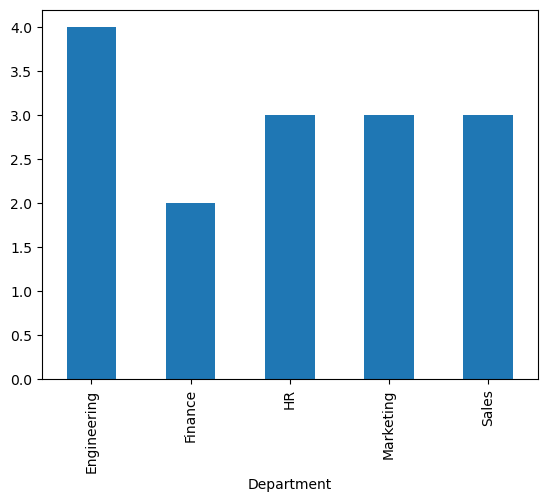

In [8]:
# %% e. Create a bar plot showing the distribution of employees across departments
df.groupby("Department")["Name"].count().plot.bar()


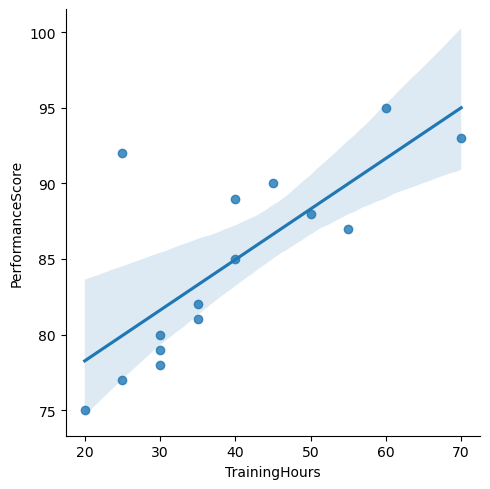

In [9]:
# %% g. Analyze the impact of training hours on performance scores.
data = df[["TrainingHours", "PerformanceScore"]]

sns.lmplot(x="TrainingHours", y="PerformanceScore", data=data, fit_reg=True)
# Create a scatter plot and fit a linear regression line


In [10]:
# %% h. Calculate the employee turnover rate, assuming employees with satisfaction scores below 3.5 are likely to leave.
unsatisfied = df[df["SatisfactionScore"] < 3.5].shape[0] # none in dataset ;)
employees = df.shape[0]

turnover_rate = ( unsatisfied / employees ) * 100
turnover_rate


0.0